In [4]:
import yfinance as yf
import numpy as np
import pandas as pd
from datetime import datetime 

maturity = '01/20/2023'
maturity = datetime.strptime(maturity, '%m/%d/%Y')

ko_call = yf.Ticker('KO230120C00057500')

call = ko_call.history()

call = call.reset_index()
call['Date'] = pd.to_datetime(call['Date']).dt.tz_convert(None)

call['toMature'] = maturity -  call['Date']
call['toMature'] =  call['toMature'].dt.days/365.25

call


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,toMature
0,2022-10-12 04:00:00,1.81,2.21,1.81,1.81,20867,0,0,0.271047
1,2022-10-13 04:00:00,1.61,2.20,1.50,2.10,9324,0,0,0.268309
2,2022-10-14 04:00:00,2.20,2.27,1.75,1.76,31697,0,0,0.265572
3,2022-10-17 04:00:00,2.05,2.20,1.97,1.97,1341,0,0,0.257358
4,2022-10-18 04:00:00,2.40,2.43,2.14,2.19,28073,0,0,0.254620
5,2022-10-19 04:00:00,2.23,2.33,1.95,2.03,554,0,0,0.251882
6,2022-10-20 04:00:00,1.75,1.77,1.58,1.60,1424,0,0,0.249144
7,2022-10-21 04:00:00,1.50,1.99,1.50,1.96,2815,0,0,0.246407
8,2022-10-24 04:00:00,2.17,2.87,2.17,2.82,24053,0,0,0.238193
9,2022-10-25 04:00:00,3.40,3.50,2.82,3.49,21827,0,0,0.235455


In [5]:
#Coca-cola 
coca = yf.Ticker('KO')
coca_history = coca.history()
coca_history = coca_history.reset_index()
coca_history['Date'] = pd.to_datetime(coca_history['Date']).dt.tz_convert(None)

coca_history['toMature'] = maturity - coca_history['Date']
coca_history['toMature'] =  coca_history['toMature'].dt.days/365.25



# coca_history.to_csv('D://PyLearning/SPDR.csv')

vol = np.std(coca_history['Close']) * (coca_history.shape[0]/365)
vol

0.12636019918757793

In [6]:
from scipy.stats import norm

class BS:
    
    @staticmethod
    
    def dist1(S, T, K, r, sigma):
        return (1/ (sigma * np.sqrt(T))) * (np.log(S/K) + (r + sigma**2 / 2) * T)
    
    def dist2(self, S, T, K, r, sigma):
        return self.dist1(S, T, K, r, sigma) - sigma * np.sqrt(T)
    
    def call_option(self, S, T, K, r, sigma):
        d1 = self.dist1(S, T, K, r, sigma)
        d2 = self.dist2(S, T, K, r, sigma)
        return norm.cdf(d1) * S - norm.cdf(d2) * K * np.exp(-r * T)

In [8]:
call_prices = []

for cl, d in zip(coca_history['Close'], coca_history['toMature']):
    call_prices.append(BS().call_option(cl, d, 57.50, 0.0385, vol))
    
call_prices

[0.7534911307221996,
 1.0105706088669741,
 0.6858650069246508,
 0.9028044770113013,
 1.2059428988478196,
 0.9891633566698594,
 0.6667726248154011,
 0.9696119107684353,
 1.7262173866112285,
 2.614196945353868,
 2.928984491594889,
 3.025303678005713,
 4.023504272401219,
 3.233596944369353,
 3.0558331245286112,
 2.422249073668006,
 2.389253627327804,
 2.729014570870845,
 2.871001226635883,
 2.9458112473348734,
 2.3108297888274407,
 3.9987407575682568,
 4.383460571236952]

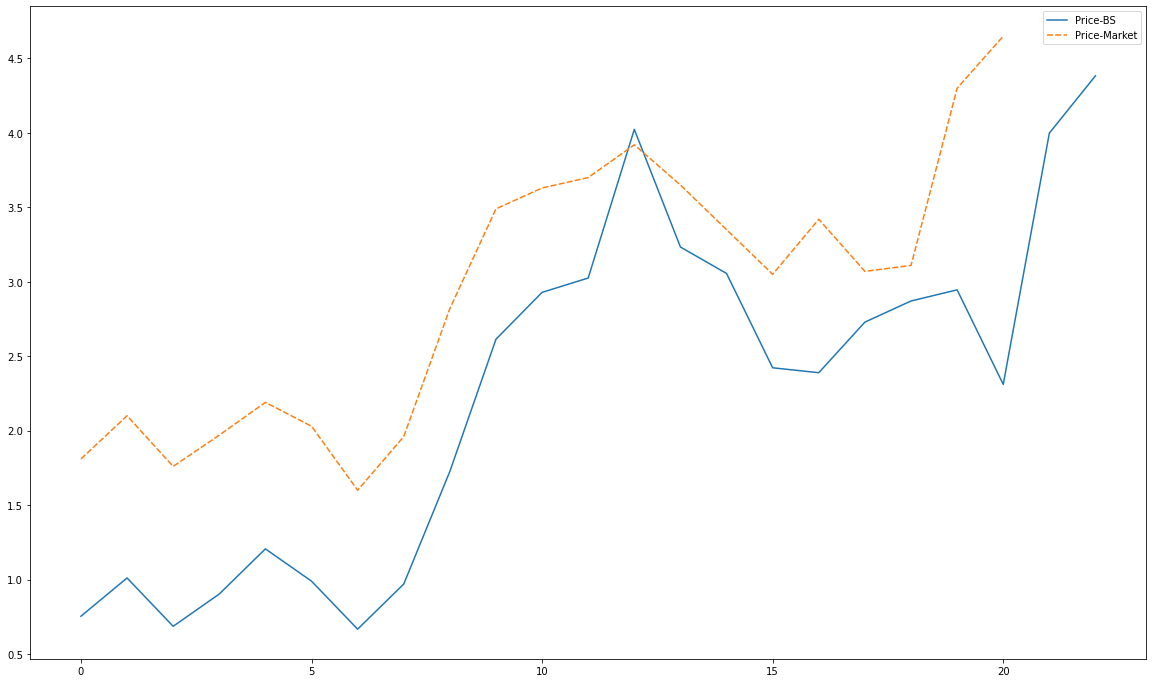

In [10]:
call_vs_market = pd.DataFrame(call_prices, columns = ['Price-BS'])

call_vs_market['Price-Market'] = call['Close']

call_vs_market['Date'] = call['Date']

import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize = (20,12)) 
sns.lineplot(data = call_vs_market)
plt.show()